In [4]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import soundfile
import librosa

#### Loading input

In [5]:
#folder_path = "data/audio/fold1"
folder_path = "data/audioMNIST/data"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
plt.plot(y);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/audioMNIST/data'

#### Get durations of sounds

In [27]:
folder_path = "data/audioMNIST/data/"
        
durations = [len(librosa.load(folder_path+file, sr=sr)[0])/sr for file in all_files if file.endswith('.wav')]


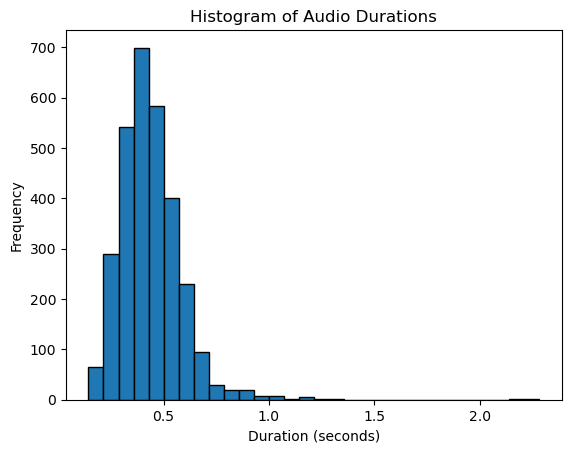

In [28]:
plt.hist(durations, bins=30, edgecolor='black')
plt.title('Histogram of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [29]:
max_duration = np.argmax(durations)
min_duration = np.argmin(durations)
print('Longest audio file:', all_files[max_duration], 'Duration:', durations[max_duration], 'seconds')
print('Shortest audio file:', all_files[min_duration], 'Duration:', durations[min_duration], 'seconds')

Longest audio file: 9_theo_16.wav Duration: 2.28275 seconds
Shortest audio file: 6_yweweler_3.wav Duration: 0.1435 seconds


In [30]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(durations, 1)
Q3 = np.percentile(durations, 99)
print('Q1:', Q1)
print('Q3:', Q3)

# Find the outliers
duration_outliers = [d for d in durations if d < Q1 or d > Q3]
np.size(duration_outliers)
print('Number of outliers:', np.size(duration_outliers))

Q1: 0.19262125
Q3: 0.9201599999999991
Number of outliers: 60


In [31]:
def load_data(folder_path):
    # Get a list of all files in the folder_path
    all_files = os.listdir(folder_path)

    # Determine samplerate of signal
    sr , _ = wavfile.read(folder_path + "/" + all_files[0])

    audio_data = []
    # Load the audio files
    for file in all_files:
        if file.endswith('.wav'):
            y = librosa.load(folder_path + "/" + file, sr=sr)[0]
            audio_data.append((y,file))

    return audio_data
    
def zero_pad_audio(audio_data, max_length):
    # Find the maximum length of the audio files
    # Zero pad the audio files
    audio_data_padded = [(librosa.util.fix_length(audio[0], size = max_length), audio[1]) for audio in audio_data]
    return audio_data_padded

In [32]:
folder_path = "data/audioMNIST/data"

ys = load_data(folder_path)
max_duration = round(Q3*sr)
ys_resized = zero_pad_audio(ys, max_duration)

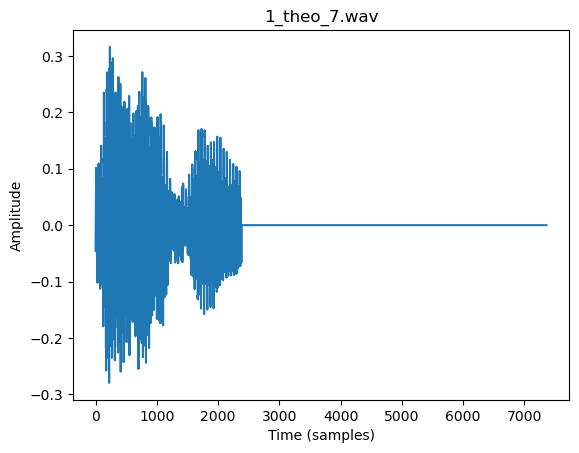

In [33]:
plt.plot(ys_resized[0][0]);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [34]:
ys_resized
all(len(signal) == len(ys_resized[0]) for signal in ys_resized)

True

In [90]:
y = librosa.util.fix_length(y, size = 8000)

#### Creating Spectrogram from original signal

Text(0.5, 1.0, 'Spectrogram')

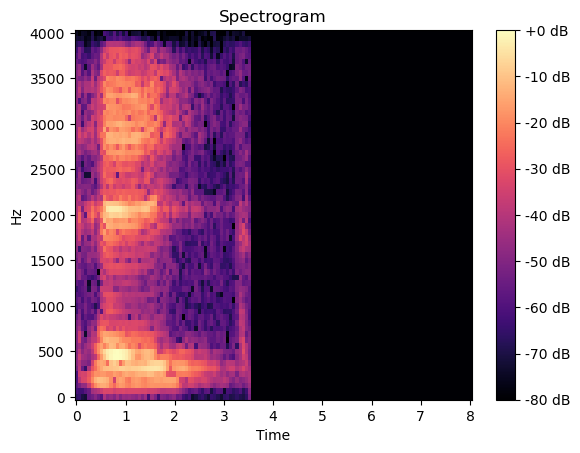

In [91]:
n_fft = 128
spec = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=n_fft//2))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='linear', fmax = sr//2, fmin=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

In [94]:
spec_db

array([[-66.214645, -64.94056 , -70.002785, ..., -80.      , -80.      ,
        -80.      ],
       [-61.572186, -63.057915, -63.08207 , ..., -80.      , -80.      ,
        -80.      ],
       [-57.786903, -51.8826  , -47.16153 , ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-67.565506, -64.21878 , -65.12259 , ..., -80.      , -80.      ,
        -80.      ],
       [-72.32024 , -73.37407 , -71.97633 , ..., -80.      , -80.      ,
        -80.      ],
       [-75.241066, -80.      , -74.52729 , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

#### Creating mel-spectrogram from time-series signal

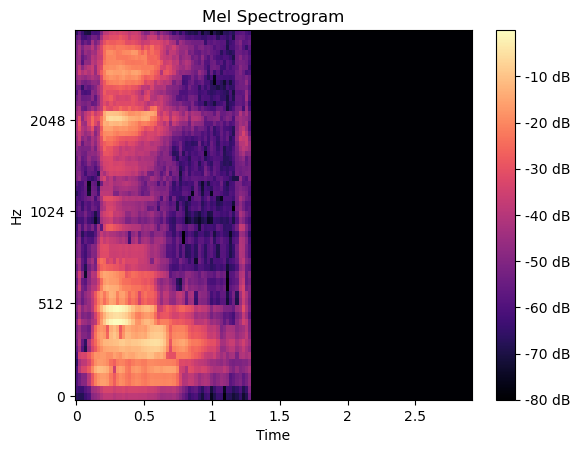

In [92]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=n_fft//2, n_mels=64)
mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect_db, y_axis='mel', fmax=sr//2,fmin=0, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

In [134]:
def all_mel_spectgram(audio_data, sr, n_fft=128, n_mels=64):
    # Compute the mel spectrogram
    melspects = []
    for audio in audio_data:
        mel_spect = librosa.feature.melspectrogram(y=audio[0], sr=sr, n_fft=n_fft, hop_length=n_fft//2, n_mels=n_mels)
        mel_spect_db = librosa.power_to_db(mel_spect, ref=2)
        melspects.append((mel_spect_db, audio[1]))
    return melspects

In [39]:
ys_resized[0][0].shape

(7361,)

In [40]:
results = all_mel_spectgram(ys_resized, sr)

#### Export mel-spectrograms to NPYs fiels

#### Export mel-spectrograms to PNG's for training

In [ ]:
# # Designated folder location to save the PNG files
# output_folder = "data/audioMNIST/data_mel"
# os.makedirs(output_folder, exist_ok=True)

# # Iterate through the results and save each mel-spectrogram as a PNG file
# for mel_spect_db, file_name in results:
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(mel_spect_db, y_axis='mel', fmax=sr//2, fmin=0, x_axis='time')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title(f'Mel Spectrogram - {file_name}')
#     plt.tight_layout()
#     output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}.png")
#     plt.savefig(output_path)
#     plt.close()

#### Loading Mel-Spectrograms

In [67]:
sample_file

'1'

In [ ]:
output_folder = "data/audioMNIST/data_mel_matrices"

sample_file_name = sample_file[0].replace(".wav","")
# Load a random mel-spectrogram from the saved .npy files
random_file = np.random.choice(all_files, size=1, replace=False)[0]
random_file_path = os.path.join(output_folder, f"{(sample_file_name)}.npy")

# Load the mel-spectrogram
mel_spect_loaded = np.load(random_file_path)

# Display the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spect_loaded, y_axis='mel', fmax=sr//2, fmin=0, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram - {random_file}')
plt.tight_layout()
plt.show()

In [72]:
sample_file[0].replace(".wav","")

'0_lucas_48'

In [80]:
output_folder = "data/audioMNIST/data_mel_matrices"

np.save(output_folder + "/" + sample_file[0].replace(".wav","") + ".npy", mel_spect_db)

In [81]:
mel_spect_loaded = np.load(output_folder + "/" + sample_file[0].replace(".wav","") + ".npy")

In [85]:
mel_spect_processed = librosa.db_to_power(mel_spect_loaded, ref=0.2)

#### Reconstructing the original time-domain signal

In [86]:

# Create Mel filter bank
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=64)

# Compute the pseudo-inverse of the Mel filter bank
mel_filter_bank_inv = np.linalg.pinv(mel_filter_bank)

# Convert Mel spectrogram back to linear-frequency spectrogram
S_linear = np.dot(mel_filter_bank_inv, mel_spect_processed)

# Ensure all values are non-negative
S_linear = np.maximum(0, S_linear)

# Step 2: Phase Reconstruction using Griffin-Lim
# Initialize with random phase
angles = np.exp(2j * np.pi * np.random.rand(*S_linear.shape))

# Initialize spectrogram with magnitude and random phase
S_complex = S_linear * angles

for i in range(32):
    # Inverse STFT
    yy = librosa.istft(S_complex, hop_length=n_fft//2)
    # Forward STFT
    S_estimated = librosa.stft(yy, n_fft=n_fft, hop_length=n_fft//2)
    # Replace magnitude with original magnitude
    S_complex = S_linear * np.exp(1j * np.angle(S_estimated))

# Step 3: Reconstruct the time-domain signal
# Final inverse STFT
y_reconstructed = librosa.istft(S_complex, hop_length=n_fft//2)

In [36]:
# S_inv = librosa.feature.inverse.mel_to_stft(mel_spect, 
#                                             sr = sr, 
#                                             n_fft=n_fft,
#                                             power=3.0,
#                                             )
# waveform_rec = librosa.istft(spec_complex, n_fft = n_fft, hop_length = n_fft//2)
#waveform_rec = librosa.griffinlim(S_inv, n_iter=32, hop_length=n_fft//2, win_length=n_fft)

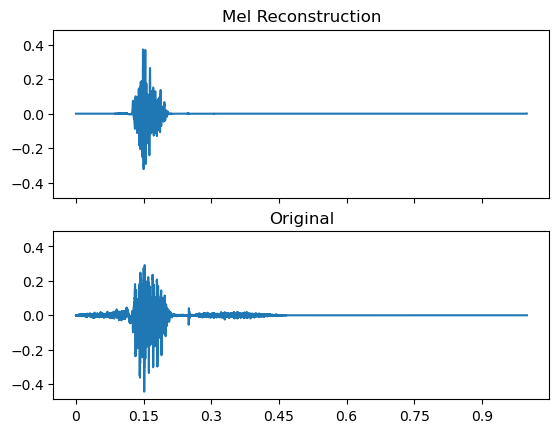

In [87]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

librosa.display.waveshow(y_reconstructed, sr=sr, ax=ax[0])
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[0].set(title='Mel Reconstruction', xlabel=None)
ax[0].label_outer()
ax[1].set(title='Original', xlabel=None)
ax[1].label_outer()

In [88]:
import soundfile as sf

sf.write('output.wav', y_reconstructed, sr)